This example will show you how to do a basic unsupervised learning on Iris dataset using *k-means clustering* and quantify the quality using *Silhouette plots*

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
           init = "k-means++",
           n_init = 10,
           max_iter = 300,
           random_state = 0)
y_km = km.fit_predict(X_pca)

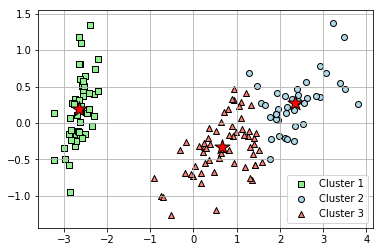

In [48]:
import matplotlib.pyplot as plt
color = ["lightgreen","lightblue","salmon"]
marker = ["s","o","^"]
label = ["Cluster 1","Cluster 2","Cluster 3"]
for i,m,c,l in zip(range(3),marker,color,label):
    plt.scatter(X_pca[y_km==i,0],X_pca[y_km==i,1],
                c = c,
               marker = m,
               edgecolors="k",
               label = l)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
           s = 250,marker = "*",
           edgecolors="k",
           color = "red")
plt.legend(loc = "best")
plt.grid()
plt.show()

Elbow plots

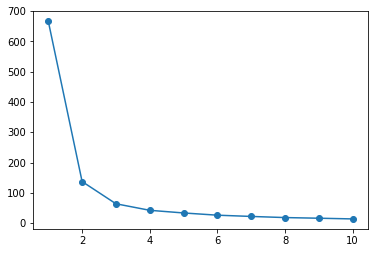

In [49]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
               n_init=10,
               init = "k-means++",
               max_iter = 300,
               random_state = 0)
    km.fit(X_pca)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker = "o")
plt.show()

As we can see that the *elbow* of the plot is at 3. Therefore, 3 is the optimal value for the number of clusters

The Clustering looks pretty good but we can actually check if it is or not using the silhouette plots

In [50]:
def plotSilhouetteSamples(X,y,km,n_clusters = 3):
    import numpy as np
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    km = KMeans(n_clusters=n_clusters,
           init = "k-means++",
           n_init = 10,
           max_iter = 300,
           tol = 1e-04,
           random_state = 0)
    y = km.fit_predict(X)
    
    cluster_labels = np.unique(y)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X,y, 
                                         metric = "euclidean")
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()

        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)

    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()
    


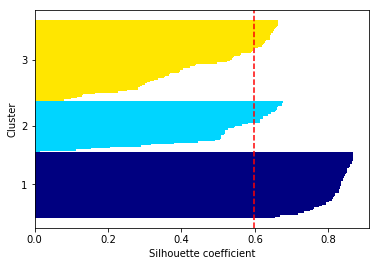

In [51]:
plotSilhouetteSamples(X_pca,y_km,km)